In [1]:
from sklearn.datasets import load_iris
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# 3. New data cleaning & One-hot encoding again

In [2]:
df = pd.read_pickle("df_cl_nodummies.pkl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32545 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32545 non-null  int64 
 1   workclass       32545 non-null  object
 2   fnlwgt          32545 non-null  int64 
 3   education-num   32545 non-null  int64 
 4   marital-status  32545 non-null  object
 5   occupation      32545 non-null  object
 6   relationship    32545 non-null  object
 7   race            32545 non-null  object
 8   sex             32545 non-null  object
 9   capital-gain    32545 non-null  int64 
 10  capital-loss    32545 non-null  int64 
 11  hours-per-week  32545 non-null  int64 
 12  native-country  32545 non-null  object
 13  salary          32545 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.7+ MB


In [4]:
for feature in df.select_dtypes(include='object'):
    print(feature, df[feature].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 'missing' ' Self-emp-inc' ' Without-pay' ' Never-worked']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' 'missing'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' ' India' 'missing' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' 

### 3.1 Data cleaning
- marital-status: changing married to married
- native-country: changing to USA or other

In [5]:
df["marital-status"].value_counts()

 Married-civ-spouse       14969
 Never-married            10679
 Divorced                  4443
 Separated                 1025
 Widowed                    988
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [6]:
df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace=True , regex = True)

In [7]:
df['native-country'].value_counts()

 United-States                 29156
 Mexico                          643
missing                          582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [8]:
for i in df['native-country'] :
    if i != ' United-States':
        df['native-country'].replace([i] , 'Others' , inplace = True)

In [9]:
df["native-country"].value_counts()

 United-States    29156
Others             3389
Name: native-country, dtype: int64

In [10]:
df["native-country"] = df["native-country"].replace(' United-States', 1)
df["native-country"] = df["native-country"].replace('Others', 0)
df["native-country"].value_counts()

1    29156
0     3389
Name: native-country, dtype: int64

In [11]:
df["sex"].value_counts()

 Male      21775
 Female    10770
Name: sex, dtype: int64

In [12]:
df["sex"] = df["sex"].replace(' Male', 1)
df["sex"] = df["sex"].replace(' Female', 0)
df["sex"].value_counts()

1    21775
0    10770
Name: sex, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32545 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32545 non-null  int64 
 1   workclass       32545 non-null  object
 2   fnlwgt          32545 non-null  int64 
 3   education-num   32545 non-null  int64 
 4   marital-status  32545 non-null  object
 5   occupation      32545 non-null  object
 6   relationship    32545 non-null  object
 7   race            32545 non-null  object
 8   sex             32545 non-null  int64 
 9   capital-gain    32545 non-null  int64 
 10  capital-loss    32545 non-null  int64 
 11  hours-per-week  32545 non-null  int64 
 12  native-country  32545 non-null  int64 
 13  salary          32545 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 3.7+ MB


In [14]:
df.to_pickle("df_cl_nodummies_v2.pkl")


In [15]:
df = pd.read_pickle("df_cl_nodummies_v2.pkl")

### 3.2 One hot encoding

In [16]:
df = pd.get_dummies(df, columns=['workclass', 'marital-status',
                                                    'occupation', 'relationship',
                                                    'race'], drop_first=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32545 entries, 0 to 32560
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   age                                    32545 non-null  int64
 1   fnlwgt                                 32545 non-null  int64
 2   education-num                          32545 non-null  int64
 3   sex                                    32545 non-null  int64
 4   capital-gain                           32545 non-null  int64
 5   capital-loss                           32545 non-null  int64
 6   hours-per-week                         32545 non-null  int64
 7   native-country                         32545 non-null  int64
 8   salary                                 32545 non-null  int64
 9   workclass_ Local-gov                   32545 non-null  uint8
 10  workclass_ Never-worked                32545 non-null  uint8
 11  workclass_ Private          

# 3.3 Balancing the dependent variables using oversampling

In [18]:
df["salary"].value_counts()

0    24711
1     7834
Name: salary, dtype: int64

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

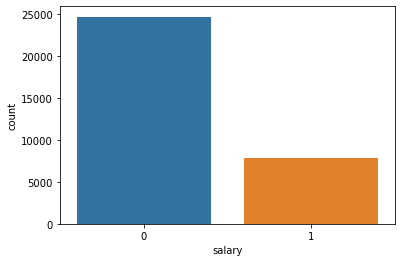

In [19]:
sns.countplot(df["salary"])

In [20]:
#60/20/20 split

X_train, X_test, y_train, y_test = train_test_split(df.drop('salary',axis=1), df['salary'], test_size=0.2, random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41) 


In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 4725
Before OverSampling, counts of label '0': 14802 



In [22]:
#conda install -c conda-forge imbalanced-learn

In [23]:
#applying oversampling only to TRAIN
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (29604, 44)
After OverSampling, the shape of train_y: (29604,) 

After OverSampling, counts of label '1': 14802
After OverSampling, counts of label '0': 14802


In [24]:
#fitting standard scaler to numeric features
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
std_scale = StandardScaler() #transforming 
X_train_res[num_cols] = std_scale.fit_transform(X_train_res[num_cols])
X_val[num_cols] = std_scale.transform(X_val[num_cols])
X_test[num_cols] = std_scale.transform(X_test[num_cols])

In [25]:
#this function was taken from the following site:
#https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
random = 1234
classifiers = [LogisticRegression(random_state=random), 
               KNeighborsClassifier(), 
               RandomForestClassifier(random_state=random),
              GradientBoostingClassifier(random_state=random),
              ExtraTreesClassifier(random_state=random),
              AdaBoostClassifier(DecisionTreeClassifier(random_state=random),
                                 random_state=random)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_res, y_train_res)
    yproba = model.predict_proba(X_val)[::,1]
    fpr, tpr, _ = roc_curve(y_val,  yproba)
    auc = roc_auc_score(y_val, yproba)    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


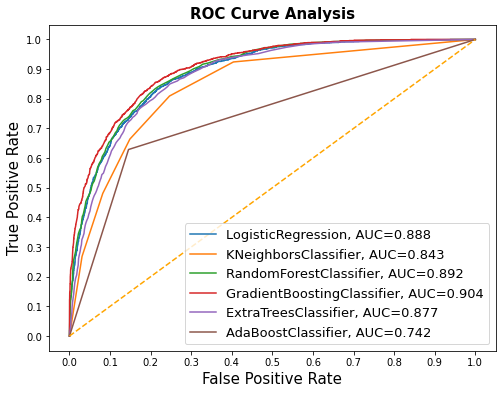

In [26]:
#this function was taken from the following site:
#https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [27]:
#default hyperparameters for GBC can be found here:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
    

In [28]:
#this hyperparameter grid search was taken from
#https://www.kaggle.com/code/mahmoudftolba/salary-prediction-classification#8-|--Modeling-
#and
#https://towardsdatascience.com/cutting-the-cord-predicting-customer-churn-for-a-telecom-company-268e65f177a5

GBC = GradientBoostingClassifier()
gb_param_grid = {'n_estimators' : [50,100,150],
                'max_depth': [4,6,8],
                'max_features': [2,3,4,5,6]}
grid_GBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=5,scoring="accuracy", n_jobs= 4)
grid_GBC.fit(X_train_res, y_train_res)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)



 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(max_depth=8, max_features=6, n_estimators=150)

 The best score across ALL searched params:
 0.8893072641126178

 The best parameters across ALL searched params:
 {'max_depth': 8, 'max_features': 6, 'n_estimators': 150}


In [29]:
GBC_best = grid_GBC.best_estimator_

In [30]:
#print(GBC_best.feature_importances_)

In [31]:
#this entire function was taken from
#https://www.kaggle.com/code/mahmoudftolba/salary-prediction-classification#8-|--Modeling-

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
             'auc': auc, 'cm': cm}

In [32]:
#as was this code chunk
##https://www.kaggle.com/code/mahmoudftolba/salary-prediction-classification#8-|--Modeling-

GBC_eval =  evaluate_model(GBC_best, X_val, y_val)
print('Accuracy:', round(GBC_eval['acc'], 2))
print('Precision:', round(GBC_eval['prec'],2))
print('Recall:', round(GBC_eval['rec'],2))
print('F1 Score:', round(GBC_eval['f1'],2))
print('Area Under Curve:', round(GBC_eval['auc'],2))
print('Confusion Matrix:\n', GBC_eval['cm'])

Accuracy: 0.86
Precision: 0.71
Recall: 0.7
F1 Score: 0.7
Area Under Curve: 0.91
Confusion Matrix:
 [[4459  455]
 [ 479 1116]]


In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6509 entries, 25482 to 17470
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    6509 non-null   float64
 1   fnlwgt                                 6509 non-null   float64
 2   education-num                          6509 non-null   float64
 3   sex                                    6509 non-null   int64  
 4   capital-gain                           6509 non-null   float64
 5   capital-loss                           6509 non-null   float64
 6   hours-per-week                         6509 non-null   float64
 7   native-country                         6509 non-null   int64  
 8   workclass_ Local-gov                   6509 non-null   uint8  
 9   workclass_ Never-worked                6509 non-null   uint8  
 10  workclass_ Private                     6509 non-null   uint8  
 11 

In [34]:
GBC_eval =  evaluate_model(GBC_best, X_test, y_test)
print('Accuracy:', round(GBC_eval['acc'], 2))
print('Precision:', round(GBC_eval['prec'],2))
print('Recall:', round(GBC_eval['rec'],2))
print('F1 Score:', round(GBC_eval['f1'],2))
print('Area Under Curve:', round(GBC_eval['auc'],2))
print('Confusion Matrix:\n', GBC_eval['cm'])

Accuracy: 0.86
Precision: 0.71
Recall: 0.7
F1 Score: 0.7
Area Under Curve: 0.92
Confusion Matrix:
 [[4553  442]
 [ 451 1063]]


# 3.4 Feature Importance

In [35]:
gradboost_model = GBC_best.fit(X_train_res, y_train_res)

In [36]:
X = df.drop("salary", axis=1)
features=[]
for columns in X.columns:
    features.append(columns)

In [37]:
#this code block was taken from
#https://medium.com/geekculture/finding-the-important-features-of-a-feature-set-a-classification-task-with-sklearns-algorithms-3003f740faf9

imp_features = gradboost_model.feature_importances_
#for i in imp_features:
    #print(i.round(3))
df_imp_features = pd.DataFrame({"features":features}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False)

,features,weights
17,marital-status_ Never-married,0.111653
20,marital-status_ married,0.093446
35,relationship_ Not-in-family,0.086451
2,education-num,0.083681
0,age,0.083123
6,hours-per-week,0.074573
4,capital-gain,0.070937
38,relationship_ Unmarried,0.065709
37,relationship_ Own-child,0.054662
5,capital-loss,0.024107


Text(0.5, 0, 'Feature Importance')

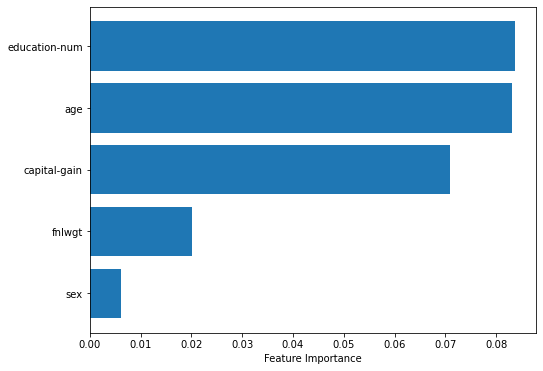

In [64]:
fig = plt.figure(figsize=(8,6))
df_imp_features_r = df_imp_features_r.sort_values('weights')
df_imp_features_r = df_imp_features.head().sort_values('weights')
plt.barh(df_imp_features_r.features, df_imp_features_r.weights)
plt.xlabel("Feature Importance")


In [38]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29604 entries, 0 to 29603
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    29604 non-null  float64
 1   fnlwgt                                 29604 non-null  float64
 2   education-num                          29604 non-null  float64
 3   sex                                    29604 non-null  int64  
 4   capital-gain                           29604 non-null  float64
 5   capital-loss                           29604 non-null  float64
 6   hours-per-week                         29604 non-null  float64
 7   native-country                         29604 non-null  int64  
 8   workclass_ Local-gov                   29604 non-null  uint8  
 9   workclass_ Never-worked                29604 non-null  uint8  
 10  workclass_ Private                     29604 non-null  uint8  
 11  wo

In [39]:
X_train_res_drop = X_train_res.drop(['marital-status_ Married-spouse-absent',
                           'marital-status_ Never-married',
                          'marital-status_ Separated',
                          'marital-status_ Widowed',
                          'marital-status_ married',
                          ], axis=1)

In [40]:
X_train_res_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29604 entries, 0 to 29603
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            29604 non-null  float64
 1   fnlwgt                         29604 non-null  float64
 2   education-num                  29604 non-null  float64
 3   sex                            29604 non-null  int64  
 4   capital-gain                   29604 non-null  float64
 5   capital-loss                   29604 non-null  float64
 6   hours-per-week                 29604 non-null  float64
 7   native-country                 29604 non-null  int64  
 8   workclass_ Local-gov           29604 non-null  uint8  
 9   workclass_ Never-worked        29604 non-null  uint8  
 10  workclass_ Private             29604 non-null  uint8  
 11  workclass_ Self-emp-inc        29604 non-null  uint8  
 12  workclass_ Self-emp-not-inc    29604 non-null 

In [41]:
#same citation for this code chunk as before
GBC = GradientBoostingClassifier()
gb_param_grid = {'n_estimators' : [50,100,150],
                'max_depth': [4,6,8],
                'max_features': [2,3,4,5,6]}
grid_GBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=5,scoring="accuracy", n_jobs= 4)
grid_GBC.fit(X_train_res_drop, y_train_res)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)



 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(max_depth=8, max_features=5, n_estimators=150)

 The best score across ALL searched params:
 0.8886655205703932

 The best parameters across ALL searched params:
 {'max_depth': 8, 'max_features': 5, 'n_estimators': 150}


In [42]:
GBC_best_drop = grid_GBC.best_estimator_

In [43]:
X_test.shape

(6509, 44)

In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6509 entries, 25482 to 17470
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    6509 non-null   float64
 1   fnlwgt                                 6509 non-null   float64
 2   education-num                          6509 non-null   float64
 3   sex                                    6509 non-null   int64  
 4   capital-gain                           6509 non-null   float64
 5   capital-loss                           6509 non-null   float64
 6   hours-per-week                         6509 non-null   float64
 7   native-country                         6509 non-null   int64  
 8   workclass_ Local-gov                   6509 non-null   uint8  
 9   workclass_ Never-worked                6509 non-null   uint8  
 10  workclass_ Private                     6509 non-null   uint8  
 11 

In [45]:
#metrics WITHOUT MARITAL STATUS
#need to first DROP marital status in X_test
X_test_drop = X_test.drop(['marital-status_ Married-spouse-absent',
                           'marital-status_ Never-married',
                          'marital-status_ Separated',
                          'marital-status_ Widowed',
                          'marital-status_ married',
                          ], axis=1)

In [46]:
#sanity check
X_test_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6509 entries, 25482 to 17470
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            6509 non-null   float64
 1   fnlwgt                         6509 non-null   float64
 2   education-num                  6509 non-null   float64
 3   sex                            6509 non-null   int64  
 4   capital-gain                   6509 non-null   float64
 5   capital-loss                   6509 non-null   float64
 6   hours-per-week                 6509 non-null   float64
 7   native-country                 6509 non-null   int64  
 8   workclass_ Local-gov           6509 non-null   uint8  
 9   workclass_ Never-worked        6509 non-null   uint8  
 10  workclass_ Private             6509 non-null   uint8  
 11  workclass_ Self-emp-inc        6509 non-null   uint8  
 12  workclass_ Self-emp-not-inc    6509 non-nul

In [47]:
gradboost_model_r = GBC.fit(X_test_drop, y_test)

In [48]:
#metrics WITHOUT MARITAL STATUS
GBC_eval_drop =  evaluate_model(gradboost_model_r, X_test_drop, y_test)
print('Accuracy:', round(GBC_eval_drop['acc'], 2))
print('Precision:', round(GBC_eval_drop['prec'],2))
print('Recall:', round(GBC_eval_drop['rec'],2))
print('F1 Score:', round(GBC_eval_drop['f1'],2))
print('Area Under Curve:', round(GBC_eval_drop['auc'],2))
print('Confusion Matrix:\n', GBC_eval_drop['cm'])

Accuracy: 0.88
Precision: 0.82
Recall: 0.62
F1 Score: 0.71
Area Under Curve: 0.94
Confusion Matrix:
 [[4793  202]
 [ 579  935]]
